In [157]:
#!pip install pandas numpy seaborn matplotlib klib pandas-profiling

In [158]:
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import klib

from sklearn.preprocessing import LabelEncoder

In [159]:
sales = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\project\sales2.csv")

# EDA

In [83]:
sales.describe()

,Sales,Discount,Profit,order months,order year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.948369,7.809686,2016.722233
std,577.559036,0.074636,239.934373,3.284654,1.123555
min,500.000000,0.100000,25.000000,1.000000,2015.000000
25%,1000.000000,0.160000,180.000000,5.000000,2016.000000
50%,1498.000000,0.230000,321.000000,9.000000,2017.000000
75%,1994.750000,0.290000,525.750000,11.000000,2018.000000
max,2500.000000,0.350000,1121.000000,12.000000,2018.000000


In [84]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   int64  
 10  State          9994 non-null   object 
 11  order months   9994 non-null   int64  
 12  order year     9994 non-null   int64  
 13  tickit size    9994 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ MB


In [85]:
sales.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
order months     0
order year       0
tickit size      0
dtype: int64

In [86]:
sales.shape

(9994, 14)

In [87]:
sales["Profit"].describe()

count    9994.000000
mean      374.948369
std       239.934373
min        25.000000
25%       180.000000
50%       321.000000
75%       525.750000
max      1121.000000
Name: Profit, dtype: float64

In [88]:
sales.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,order months,order year,tickit size
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,Tamil Nadu,11,2017,low value
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,Tamil Nadu,11,2017,low value
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,Tamil Nadu,6,2017,high value
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,Tamil Nadu,10,2016,low value
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,Tamil Nadu,10,2016,high value


# selecting feature based om requirements

In [89]:
sales.drop(["Order ID", "Customer Name", "State"],axis=1,inplace=True)

In [90]:
sales.head()

,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,order months,order year,tickit size
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,11,2017,low value
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,11,2017,low value
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,6,2017,high value
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,10,2016,low value
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,10,2016,high value


In [91]:
sales["Category"].value_counts()

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

# finding the most selling catogary using graphs

In [92]:
cat = sales.groupby('Category') .agg({'Sales': 'sum'}).sort_values('Sales',ascending=False)[:7]
print(cat)

                     Sales
Category                  
Eggs, Meat & Fish  2267401
Snacks             2237546
Food Grains        2115272
Bakery             2112281
Fruits & Veggies   2100727
Beverages          2085313
Oil & Masala       2038442


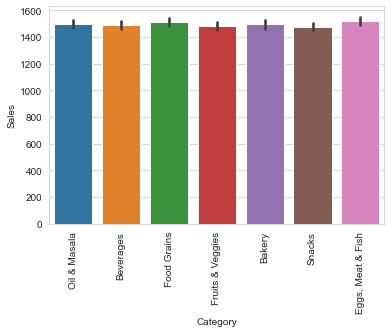

In [93]:
sns.barplot(x='Category', y='Sales',data=sales.reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

In [94]:
# Conclusion:- "Eggs, Meat & Fish" is the most sold category with 2,267,401 number of sales.

In [95]:
profitable_city = pd.DataFrame(sales.groupby(['City']).sum()['Profit'])
profitable_city.sort_values(by=['Profit'], inplace = True, ascending = False)
print(profitable_city.head(24))

                Profit
City                  
Vellore         174074
Bodi            173667
Kanyakumari     172230
Perambalur      171144
Karur           169310
Tirunelveli     165180
Pudukottai      164072
Chennai         160929
Salem           160899
Krishnagiri     160478
Ramanadhapuram  158956
Coimbatore      157401
Cumbum          156358
Tenkasi         156236
Madurai         152548
Virudhunagar    150809
Ooty            150077
Namakkal        145506
Dindigul        144876
Viluppuram      144199
Theni           142750
Dharmapuri      141602
Nagercoil       137863
Trichy          136070


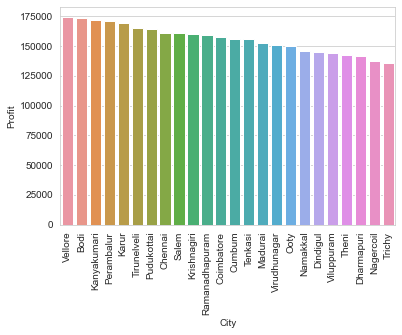

In [96]:
sns.barplot(x='City', y='Profit',data=profitable_city.head(24).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

In [97]:
# Conclusion:- "Vellore" is the most Profitable City with the profit of  approx ₹1,74,073 

# which region has the best sales ?

In [98]:
profitable_region = pd.DataFrame(sales.groupby(['Region']).sum()['Sales'])
profitable_region.sort_values(by=['Sales'], inplace = True, ascending = False)
print(profitable_region)

           Sales
Region          
West     4798743
East     4248368
Central  3468156
South    2440461
North       1254


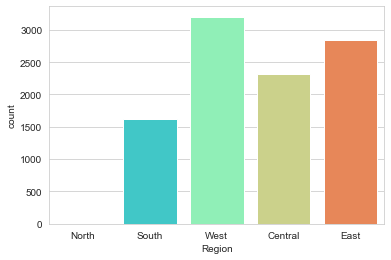

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Region',data=sales, palette='rainbow')
plt.show()

In [100]:
# Conclusion:- "Western Region" has the best sales with the count of 4,798,743 

# which is the most popular sub catogery

In [101]:
profitable_subcategory = pd.DataFrame(sales.groupby(['Sub Category']).sum()['Profit'])
profitable_subcategory.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_subcategory.head(23)

,Profit
Sub Category,
Health Drinks,267480
Soft Drinks,258158
Noodles,193694
Breads & Buns,190771
Cookies,190647
Chocolates,183854
Biscuits,169367
Masalas,169013
Edible Oil & Ghee,168601


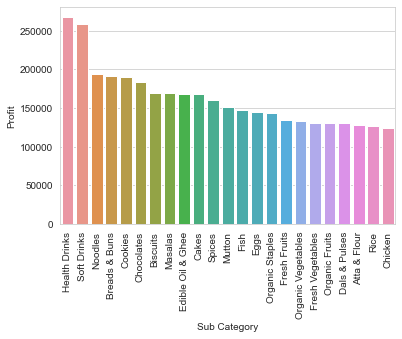

In [102]:
sns.barplot(x='Sub Category',y='Profit',data=profitable_subcategory.head(23).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

In [103]:
# Conclusion:- "Health Drinks" is the most Profitable Sub Category with the profit of approx ₹2,67,469

GridSpec(6, 6)

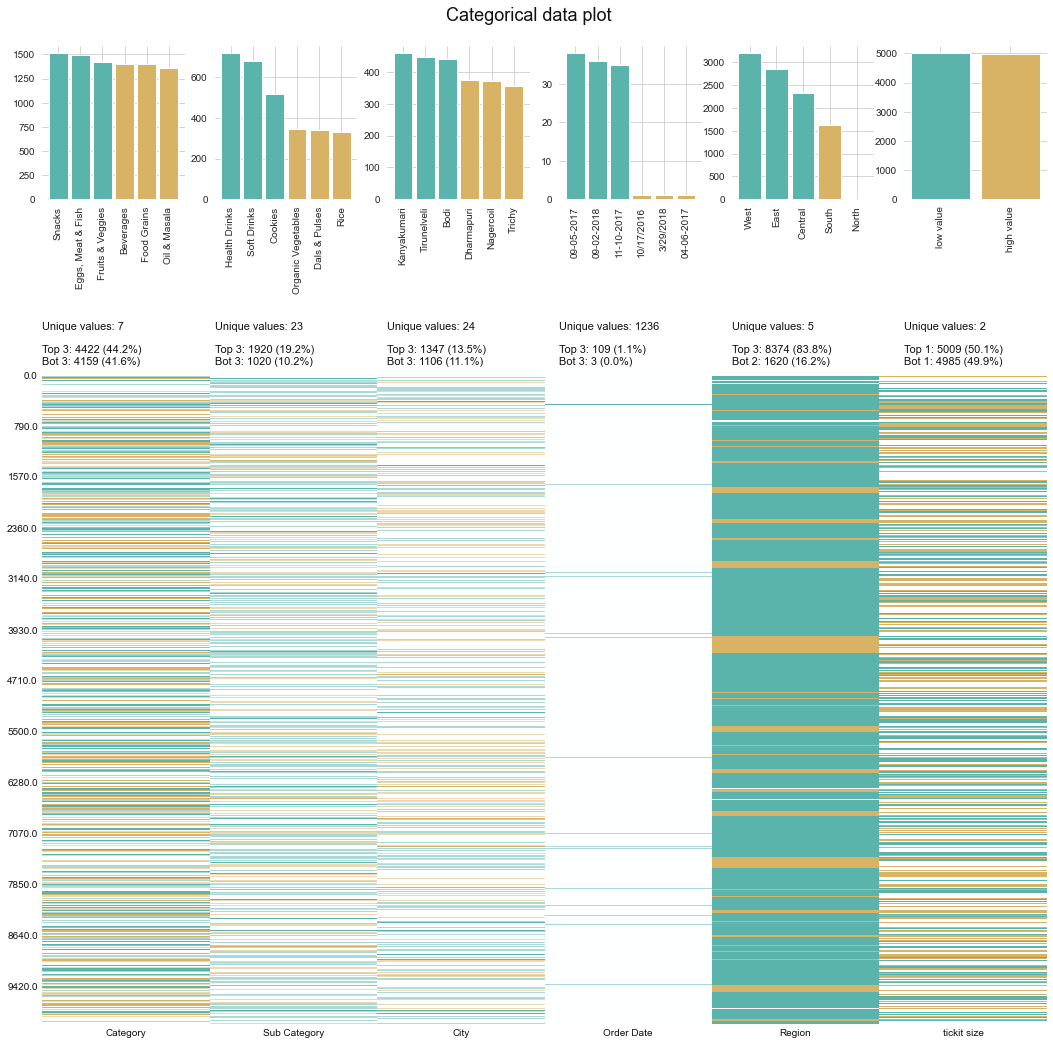

In [104]:
klib.cat_plot(sales)

In [105]:
from pandas_profiling import ProfileReport 

In [106]:
profile = ProfileReport(sales, title="Pandas Profiling Report")

In [107]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

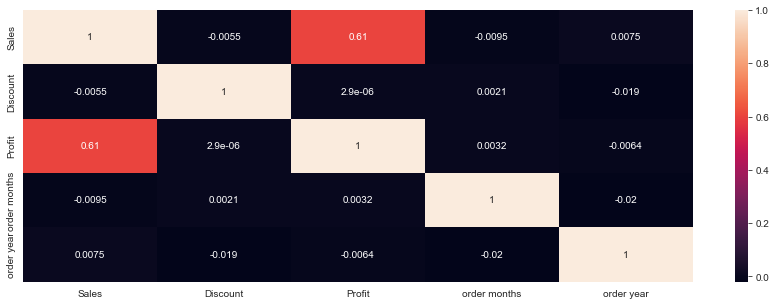

In [108]:
plt.figure(figsize=(15,5))
sns.heatmap(sales.corr(),annot=True)
plt.show()

# Data Cleaning using klib Librery

<AxesSubplot: xlabel='order year', ylabel='Density'>

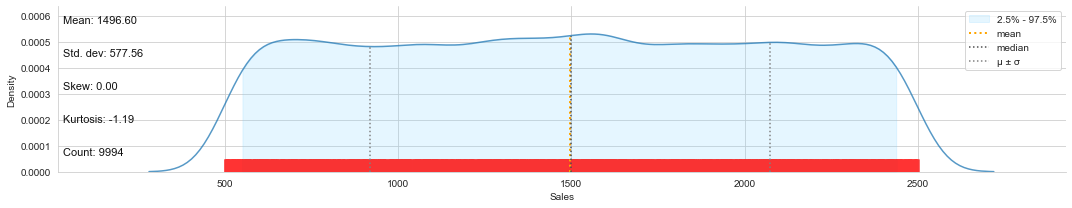

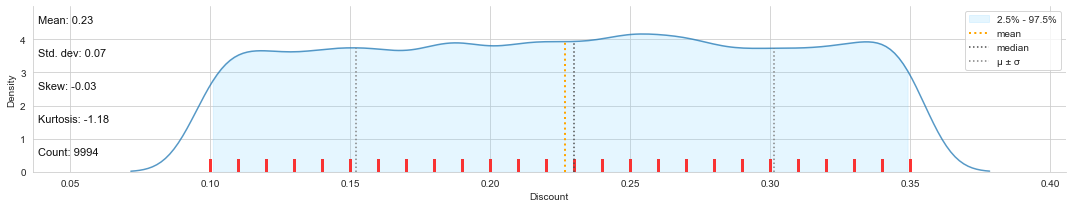

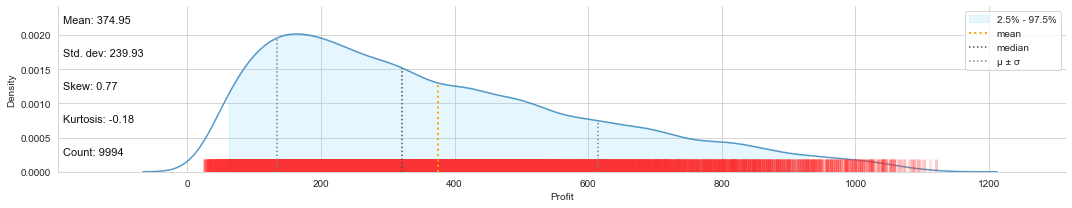

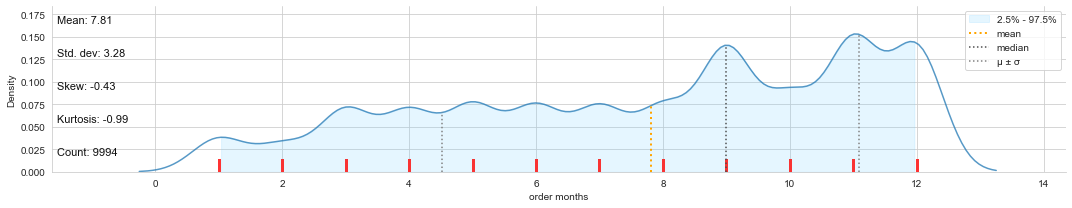

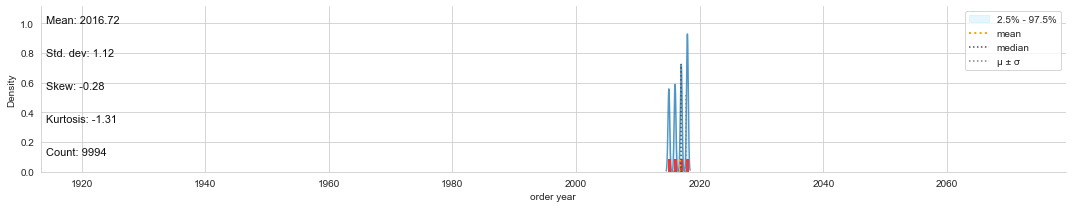

In [109]:
klib.dist_plot(sales)

In [110]:
klib.missingval_plot(sales)

No missing values found in the dataset.


In [111]:
klib.data_cleaning(sales)

Shape of cleaned data: (9994, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.61 MB (-72.62%)



,category,sub_category,city,order_date,region,sales,discount,profit,order_months,order_year,tickit_size
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,11,2017,low value
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,11,2017,low value
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,6,2017,high value
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,10,2016,low value
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,10,2016,high value
...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359,12,2015,low value
9990,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,72,7,2015,low value
9991,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501,6,2017,high value
9992,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597,10,2018,high value


In [112]:
klib.clean_column_names(sales)

,category,sub_category,city,order_date,region,sales,discount,profit,order_months,order_year,tickit_size
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,11,2017,low value
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,11,2017,low value
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,6,2017,high value
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,10,2016,low value
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,10,2016,high value
...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359,12,2015,low value
9990,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,72,7,2015,low value
9991,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501,6,2017,high value
9992,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597,10,2018,high value


In [113]:
klib.convert_datatypes(sales)

,category,sub_category,city,order_date,region,sales,discount,profit,order_months,order_year,tickit_size
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,11,2017,low value
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,11,2017,low value
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,6,2017,high value
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,10,2016,low value
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,10,2016,high value
...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359,12,2015,low value
9990,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,72,7,2015,low value
9991,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501,6,2017,high value
9992,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597,10,2018,high value


In [114]:
klib.drop_missing(sales)

,category,sub_category,city,order_date,region,sales,discount,profit,order_months,order_year,tickit_size
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,11,2017,low value
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,11,2017,low value
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,6,2017,high value
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,10,2016,low value
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,10,2016,high value
...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359,12,2015,low value
9990,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,72,7,2015,low value
9991,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501,6,2017,high value
9992,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597,10,2018,high value


In [115]:
klib.mv_col_handling(sales)

,category,sub_category,city,order_date,region,sales,discount,profit,order_months,order_year,tickit_size
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401,11,2017,low value
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,150,11,2017,low value
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165,6,2017,high value
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,90,10,2016,low value
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918,10,2016,high value
...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359,12,2015,low value
9990,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,72,7,2015,low value
9991,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501,6,2017,high value
9992,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597,10,2018,high value


In [116]:
klib.pool_duplicate_subsets(sales)

,city,order_date,sales,discount,profit,pooled_vars
0,Vellore,11-08-2017,1254,0.12,401,0
1,Krishnagiri,11-08-2017,749,0.18,150,1
2,Perambalur,06-12-2017,2360,0.21,165,2
3,Dharmapuri,10-11-2016,896,0.25,90,3
4,Ooty,10-11-2016,2355,0.26,918,4
...,...,...,...,...,...,...
9989,Madurai,12/24/2015,945,0.16,359,6453
9990,Kanyakumari,07-12-2015,1195,0.26,72,9990
9991,Bodi,06-06-2017,1567,0.16,501,9991
9992,Pudukottai,10/16/2018,1659,0.15,597,6122


# Preprocessing task before modelbuilding

1) Lebel encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [118]:
sales = sales.apply(le.fit_transform)

In [119]:
sales

,category,sub_category,city,order_date,region,sales,discount,profit,order_months,order_year,tickit_size
0,5,14,21,539,2,748,2,376,10,2,1
1,1,13,8,539,3,246,8,125,10,2,1
2,3,0,13,226,4,1849,11,140,5,2,0
3,4,12,4,439,3,393,15,65,9,1,1
4,3,18,12,439,3,1845,16,888,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,2,9,9,713,4,442,6,334,11,0,1
9990,0,1,6,264,4,690,16,47,6,0,1
9991,3,20,0,207,4,1059,6,476,5,2,0
9992,5,22,14,458,4,1150,5,572,9,3,0


In [120]:
X = sales.iloc[:,[5, 7]].values
y = sales.iloc[:, 7].values

In [121]:
X, y

(array([[ 748,  376],
        [ 246,  125],
        [1849,  140],
        ...,
        [1059,  476],
        [1150,  572],
        [ 531,  140]], dtype=int64),
 array([376, 125, 140, ..., 476, 572, 140], dtype=int64))

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=100)

In [124]:
X_train, X_test, y_train, y_test

(array([[ 393,  342],
        [1753,  247],
        [ 211,   46],
        ...,
        [ 310,  276],
        [1950,  812],
        [ 682,  165]], dtype=int64),
 array([[1392,  622],
        [ 912,  160],
        [ 180,  159],
        ...,
        [1408,  837],
        [ 300,  192],
        [   5,   10]], dtype=int64),
 array([342, 247,  46, ..., 276, 812, 165], dtype=int64),
 array([622, 160, 159, ..., 837, 192,  10], dtype=int64))

# standardization

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [126]:
X_train = sc.fit_transform(X_train)

In [127]:
X_test = sc.transform(X_test)

In [128]:
X_test

array([[ 0.68103496,  1.12382255],
       [-0.14364375, -0.79026041],
       [-1.40127878, -0.79440344],
       ...,
       [ 0.70852425,  2.01457545],
       [-1.19510911, -0.65768323],
       [-1.7019429 , -1.41171591]])

# model building using Linear Regression


In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
regressor = LinearRegression()

In [131]:
regressor.fit(X_train, y_train)

LinearRegression()

In [132]:
X_train

array([[-1.03532761, -0.03622772],
       [ 1.30126207, -0.42981621],
       [-1.34801828, -1.26256659],
       ...,
       [-1.1779283 , -0.30966815],
       [ 1.63972396,  1.91099953],
       [-0.5388023 , -0.76954522]])

In [133]:
y_pred = regressor.predict(X_test)

In [134]:
y_pred

array([622., 160., 159., ..., 837., 192.,  10.])

In [135]:
from sklearn import metrics

In [136]:
print(metrics.mean_squared_error(y_test, y_pred))

9.829097961790254e-27


In [137]:
print(metrics.mean_absolute_error(y_test, y_pred))

7.297369867511184e-14


In [138]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

9.914180733570603e-14


In [139]:
print(metrics.r2_score(y_test, y_pred))

1.0


# Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [141]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
y_pred = rf.predict(X_test)

In [143]:
print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

0.3917367308654325
0.27931340670335114
0.6258887527871326
0.9999930851543457


# Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [146]:
y_pred = clf.predict(X_test)

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
print("training accuracy (Gini):", accuracy_score(y_train, clf.predict(X_train)))
print("test accuracy (gini):", accuracy_score(y_test, y_pred))

training accuracy (Gini): 1.0
test accuracy (gini): 0.7940220110055027


In [149]:
from sklearn import tree

In [150]:
#plt.figure(figsize=(10,10))
#tree.plot_tree(clf)
#plt.show()

# svm 

In [151]:
from sklearn import svm

In [152]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [153]:
y_pred = clf.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [155]:
print("Accuracy score is :", accuracy_score(y_test, y_pred))
print("Confusion Matrix are :", confusion_matrix(y_test, y_pred))

Accuracy score is : 0.0080040020010005
Confusion Matrix are : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [156]:
print("Classification Report is :", classification_report(y_test, y_pred))

Classification Report is :               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         5


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
